## Script is designed to Comparison of test results of the same milk samples in two different laboratories

The raw data was taken from the DHI laboratory of AO Agroplem and one other DHI laboratory. <br>
The analysis was carried out on a FOSS machine and Bently machine. <br>
Milk probe were from the Russian population of black-and-white Holstein were analysed.

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
from PIL import Image, ImageDraw, ImageFont, ImageFilter
from pandas.plotting import table
import seaborn as sns; sns.set(style="white", color_codes=True)
import six, os
from sklearn.linear_model import LinearRegression
from scipy import stats

In [7]:
vr = pd.read_excel('input/Lab1.xlsx')
ap = pd.read_excel('input/Lab2.xlsx')

vr.head(3)

,Порядковый номер пробы,Инв. № животного,"a-Жир, %","a-Сырой белок, %","a-Истинный белок, %","a-Лактоза, %","a-С.В., %","a-СОМО, %","a-РН, ед.","a-Мочевина, мг%","a-Ацетон, мM/дм3","a-БГБ, мM/дм3","a-Казеин В, %","a-Точка замерзания, 0Cx10-3","a-Соматические клетки, тыс/см3"
0,1,5523,7.86,4.02,3.85,4.78,17.54,9.77,6.46,35.0,0.0,0.01,3.35,518,52
1,2,3870,8.82,4.50,4.29,4.79,19.14,10.32,6.50,38.1,0.0,0.00,3.79,546,252
2,3,4436,6.14,3.71,3.52,4.78,15.38,9.27,6.55,39.7,0.0,0.03,2.98,521,767


In [8]:
# MERGE results

In [9]:
mre = pd.merge(ap, vr, on="Инв. № животного")
mre.head(2)

,№ Пробы,Инв. № животного,жир,белок,лактоза,сух вещ,СОМО,мочевина,ТЗ,ацетон,...,"a-Лактоза, %","a-С.В., %","a-СОМО, %","a-РН, ед.","a-Мочевина, мг%","a-Ацетон, мM/дм3","a-БГБ, мM/дм3","a-Казеин В, %","a-Точка замерзания, 0Cx10-3","a-Соматические клетки, тыс/см3"
0,1.0,5523.0,7.50,3.91,4.807,17.08,9.51,35.9,557.0,0.00,...,4.78,17.54,9.77,6.46,35.0,0.0,0.01,3.35,518,52
1,2.0,3870.0,7.64,4.40,4.844,17.80,10.11,36.5,593.0,3.65,...,4.79,19.14,10.32,6.50,38.1,0.0,0.00,3.79,546,252


### Create function

In [53]:
def linReg(a,b):
    
    X = mre[[a]].values
    y = mre[b].values

    slr = LinearRegression()
    slr.fit(X, y)
    y_pred = slr.predict(X)
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(mre[a], mre[b])
    
    plt.figure(figsize=(5, 5),dpi=100)
    plt.title(a+'\n', fontsize=14)

    plt.plot(mre[a],mre[b], 'yellow', marker='o', lw=3, 
         linestyle = 'None', ms=4,  markeredgecolor ='grey')

    plt.xlabel('Lab1')
    plt.ylabel('Lab2')
    
    plt.plot(X,y_pred)
    
    return [print('RealValue = '+str(slope.round(3))+' * Lab1_Value + '+str(intercept.round(2))),
           print('Slope = '+str(slope.round(3))+' Intersept = '+str(intercept.round(2))),
           print('R2 = '+str(r_value)[0:4]),
           plt.savefig('Fat.png',dpi=200)]

In [74]:
def linRegCf(a,b):
    
    X = mre[[a]].values
    y = mre[b].values

    slr = LinearRegression()
    slr.fit(X, y)
    y_pred = slr.predict(X)
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(mre[a], mre[b])
        
    return [print(a,'\n'),
            print(' Slope = '+str(slope.round(3)),'\n','Intersept = '+str(intercept.round(2))),
            print(' R2 = '+str(r_value)[0:4],'\n')]

### Make plots and calculations

In [75]:
# Calculate the coefficients for each milk parameter

linRegCf('a-Жир, %','жир')
linRegCf('a-Истинный белок, %','белок')
linRegCf('a-Мочевина, мг%','мочевина')
linRegCf('a-БГБ, мM/дм3','БГБ')
linRegCf('a-Ацетон, мM/дм3', 'ацетон')
linRegCf('a-Точка замерзания, 0Cx10-3','ТЗ')
linRegCf('a-Лактоза, %', 'лактоза')

a-Жир, % 

 Slope = 0.839 
 Intersept = 0.5
 R2 = 0.93 

a-Истинный белок, % 

 Slope = 0.882 
 Intersept = 0.57
 R2 = 0.93 

a-Мочевина, мг% 

 Slope = 0.636 
 Intersept = 6.52
 R2 = 0.72 

a-БГБ, мM/дм3 

 Slope = 20.202 
 Intersept = 2.52
 R2 = 0.21 

a-Ацетон, мM/дм3 

 Slope = 9.29 
 Intersept = 2.45
 R2 = 0.25 

a-Точка замерзания, 0Cx10-3 

 Slope = 1.591 
 Intersept = -263.63
 R2 = 0.43 

a-Лактоза, % 

 Slope = 0.803 
 Intersept = 1.0
 R2 = 0.93 



[None, None, None]

RealValue = 0.839 * Lab1_Value + 0.5
Slope = 0.839 Intersept = 0.5
R2 = 0.93


[None, None, None, None]

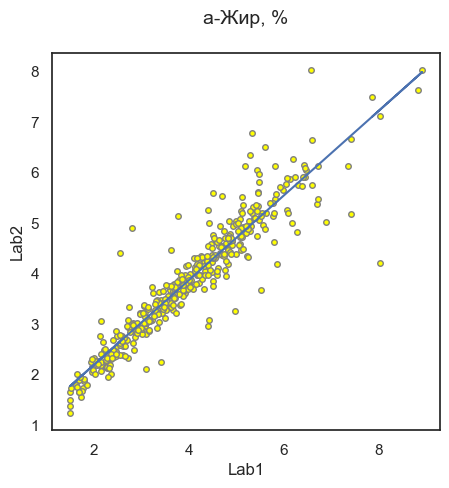

In [55]:
linReg('a-Жир, %','жир')

#linReg('a-Истинный белок, %','белок')
#linReg('a-Мочевина, мг%','мочевина')
#linReg('a-БГБ, мM/дм3','БГБ')
#linReg('a-Ацетон, мM/дм3', 'ацетон')
#linReg('a-Точка замерзания, 0Cx10-3','ТЗ')
#linReg('a-Лактоза, %', 'лактоза')

### Conclusion: 
We observe a sufficiently high correlation for parameters such as fat, protein and Lactose. <br>
We observe a low correlation for parameters BGB, acetone, FPD.